In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [2]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('Democratic Party', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536212930.0
2018-09-05 22:48:50
Confederate group loses fight over Ole Miss' Civil War monuments changes
489
2
1526369492.0
2018-05-15 00:31:32
After Amazon opposition, Seattle passes compromise tax to fund homeless services
461
3
1524227819.0
2018-04-20 05:36:59
Kushner Cos. subpoenaed by feds after AP report
1039
4
1521172091.0
2018-03-15 20:48:11
Mueller subpoenas Trump Organization, demanding documents about Russia.
87
5
1519361749.0
2018-02-22 20:55:49
‘Suddenly there is a Confederate flag flying’ in Seattle’s Greenwood area – well, not quite
27
6
1518907934.0
2018-02-17 14:52:14
Philadelphia DA Larry Krasner Sues Big Pharma, Drops All Marijuana Possession Charges
61800
7
1517669564.0
2018-02-03 06:52:44
Germany votes to cut state funding to neo-Nazi political party
20651
8
1517435824.0
2018-01-31 13:57:04
Police arrest Virginia Tech student who purchased 5,000 rounds of ammunition.
74
9
1517170480.0
2018-01-28 12:14:40
Beaten by a legislator: Juneau woman accuses law

In [3]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536213e+09,2018-09-05 22:48:50,Confederate group loses fight over Ole Miss' C...,489
1,1.526369e+09,2018-05-15 00:31:32,"After Amazon opposition, Seattle passes compro...",461
2,1.524228e+09,2018-04-20 05:36:59,Kushner Cos. subpoenaed by feds after AP report,1039
3,1.521172e+09,2018-03-15 20:48:11,"Mueller subpoenas Trump Organization, demandin...",87
4,1.519362e+09,2018-02-22 20:55:49,‘Suddenly there is a Confederate flag flying’ ...,27
5,1.518908e+09,2018-02-17 14:52:14,"Philadelphia DA Larry Krasner Sues Big Pharma,...",61800
6,1.517670e+09,2018-02-03 06:52:44,Germany votes to cut state funding to neo-Nazi...,20651
7,1.517436e+09,2018-01-31 13:57:04,Police arrest Virginia Tech student who purcha...,74
8,1.517170e+09,2018-01-28 12:14:40,Beaten by a legislator: Juneau woman accuses l...,68
9,1.510380e+09,2017-11-10 21:53:24,NRSC severs fundraising ties with Roy Moore,194


In [4]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [5]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536213e+09,2018-09-05 22:48:50,Confederate group loses fight over Ole Miss' C...,489
1,1,1.526369e+09,2018-05-15 00:31:32,"After Amazon opposition, Seattle passes compro...",461
2,2,1.524228e+09,2018-04-20 05:36:59,Kushner Cos. subpoenaed by feds after AP report,1039
3,5,1.518908e+09,2018-02-17 14:52:14,"Philadelphia DA Larry Krasner Sues Big Pharma,...",61800
4,6,1.517670e+09,2018-02-03 06:52:44,Germany votes to cut state funding to neo-Nazi...,20651
5,9,1.510380e+09,2017-11-10 21:53:24,NRSC severs fundraising ties with Roy Moore,194


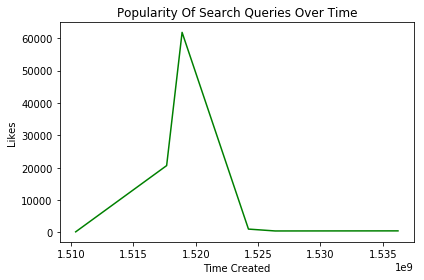

In [6]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()